# Import statements, load data

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

dir = "/Users/amulyagarimella/Desktop/Buenrostro_Lab/Progeria/progeria-prediction/"
progeria = pd.read_csv(rf"{dir}230705_progeria_c2/IdentifyPrimaryObjects.csv")
normal = pd.read_csv(rf"{dir}230705_normal_c2/IdentifyPrimaryObjects.csv")

# General comparison functions

In [3]:
def hist(col, data1 = progeria, data2 = normal, xlim=None, ylim=None):
    sns.histplot(data=data1,x=col,color="r",label="Progeria",stat="probability")
    sns.histplot(data=data2,x=col,color="b",label="Normal",stat="probability")
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    plt.show()

def ttest (data1 = progeria, data2 = normal, cols=None):
    if not cols:
        cols = data1.columns
    tstat, tp = stats.ttest_ind(data1[cols], data2[cols], axis=0, nan_policy='omit')
    return dict(zip(cols, tstat)), dict(zip(cols, tp))

def split_vp(col, data1 = progeria, data2 = normal, xlim=None, ylim=None):
   p = pd.concat([data1[col], data2[col]],axis=1).set_axis(labels=['progeria','normal'],axis=1)
   p.replace([np.inf, -np.inf], np.nan, inplace=True)
   p = p.dropna()
   p = pd.melt(p,value_name=col,var_name='condition')
   sns.violinplot(data=p, x=pd.Series(['']*len(p)), y=col, hue='condition', legend=True,split=True,scale='width')
   if xlim:
        plt.xlim(xlim)
   if ylim:
      plt.ylim(ylim)
   plt.show()

# Comparison: all cells

In [4]:
cols_to_drop = ["ImageNumber", "ObjectNumber", "Number_Object_Number"]
size_based = ["AreaShape_Area","AreaShape_Perimeter", "AreaShape_BoundingBoxArea", "AreaShape_BoundingBoxMaximum_X", "AreaShape_BoundingBoxMaximum_Y", "AreaShape_BoundingBoxMinimum_X", "AreaShape_BoundingBoxMinimum_Y", "AreaShape_ConvexArea", "AreaShape_EquivalentDiameter", "AreaShape_MajorAxisLength", "AreaShape_MinorAxisLength", "AreaShape_MaxFeretDiameter", "AreaShape_MinFeretDiameter", "AreaShape_MaximumRadius", "AreaShape_MeanRadius", "AreaShape_MedianRadius"]
posn_based = ["AreaShape_Center_X", "AreaShape_Center_Y", "Location_Center_X","Location_Center_Y", "Location_Center_Z"]
		
features = [x for x in progeria.columns if x not in cols_to_drop]
relative_features = [x for x in progeria.columns if x not in cols_to_drop + size_based + posn_based]

In [5]:
tstats_all, tps_all = ttest(cols=relative_features)

# Comparison: remove progeria images with too many objects

In [6]:
max_objs = normal.ObjectNumber.max() 
progeria_fewer_objs = progeria.groupby('ImageNumber').filter(lambda x: x['ObjectNumber'].max()<=max_objs ).reset_index(drop=True)
print((len(progeria_fewer_objs), len(normal)))

(502, 142)


## Checking which features are significant

In [177]:
tstats_progeria_fewer_objs, tps_progeria_fewer_objs = ttest(cols=relative_features, data1=progeria_fewer_objs)

In [178]:
print([x for x in relative_features if tps_all[x] < 0.05])
print([x for x in relative_features if tps_progeria_fewer_objs[x] < 0.05])

['AreaShape_Eccentricity', 'AreaShape_Orientation', 'AreaShape_Solidity', 'AreaShape_Zernike_0_0', 'AreaShape_Zernike_2_0', 'AreaShape_Zernike_2_2', 'AreaShape_Zernike_4_0', 'AreaShape_Zernike_4_2', 'AreaShape_Zernike_4_4', 'AreaShape_Zernike_5_3', 'AreaShape_Zernike_5_5', 'AreaShape_Zernike_6_0', 'AreaShape_Zernike_6_2', 'AreaShape_Zernike_6_4', 'AreaShape_Zernike_6_6', 'AreaShape_Zernike_7_1', 'AreaShape_Zernike_7_3', 'AreaShape_Zernike_7_5', 'AreaShape_Zernike_7_7', 'AreaShape_Zernike_8_0', 'AreaShape_Zernike_8_2', 'AreaShape_Zernike_8_4', 'AreaShape_Zernike_8_6', 'AreaShape_Zernike_8_8', 'AreaShape_Zernike_9_1', 'AreaShape_Zernike_9_3', 'AreaShape_Zernike_9_5', 'AreaShape_Zernike_9_7', 'AreaShape_Zernike_9_9']
['AreaShape_Eccentricity', 'AreaShape_FormFactor', 'AreaShape_Orientation', 'AreaShape_Solidity', 'AreaShape_Zernike_0_0', 'AreaShape_Zernike_1_1', 'AreaShape_Zernike_2_0', 'AreaShape_Zernike_2_2', 'AreaShape_Zernike_4_2', 'AreaShape_Zernike_4_4', 'AreaShape_Zernike_6_0', 'Ar

In [281]:
print("more significant in all cells: " + ", ".join([x for x in relative_features if tps_all[x] < tps_progeria_fewer_objs[x]]))
print("more significant in cut cells: " + ", ".join([x for x in relative_features if tps_all[x] > tps_progeria_fewer_objs[x]]))

more significant in all cells: AreaShape_Compactness, AreaShape_Extent, AreaShape_Orientation, AreaShape_Solidity, AreaShape_Zernike_2_0, AreaShape_Zernike_2_2, AreaShape_Zernike_4_0, AreaShape_Zernike_4_2, AreaShape_Zernike_4_4, AreaShape_Zernike_5_1, AreaShape_Zernike_5_3, AreaShape_Zernike_5_5, AreaShape_Zernike_6_0, AreaShape_Zernike_6_2, AreaShape_Zernike_6_4, AreaShape_Zernike_6_6, AreaShape_Zernike_7_1, AreaShape_Zernike_7_3, AreaShape_Zernike_7_5, AreaShape_Zernike_7_7, AreaShape_Zernike_8_0, AreaShape_Zernike_8_2, AreaShape_Zernike_8_4, AreaShape_Zernike_8_6, AreaShape_Zernike_8_8, AreaShape_Zernike_9_1, AreaShape_Zernike_9_3, AreaShape_Zernike_9_5, AreaShape_Zernike_9_7, AreaShape_Zernike_9_9
more significant in cut cells: AreaShape_Eccentricity, AreaShape_EulerNumber, AreaShape_FormFactor, AreaShape_Zernike_0_0, AreaShape_Zernike_1_1, AreaShape_Zernike_3_1, AreaShape_Zernike_3_3


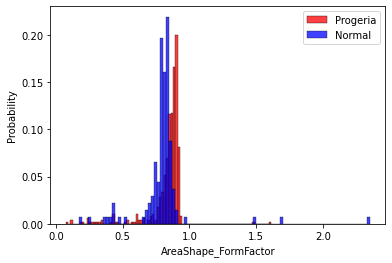

In [183]:
hist("AreaShape_FormFactor", data1=progeria_fewer_objs)

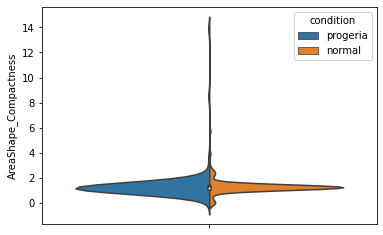

In [187]:
split_vp("AreaShape_Compactness", data1=progeria_fewer_objs)

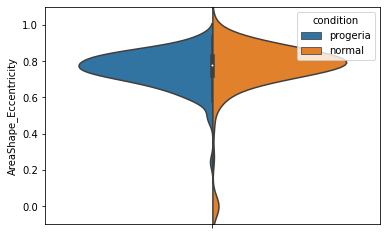

In [185]:
split_vp("AreaShape_Eccentricity", data1=progeria,ylim=(-0.1,1.1))

# Nuclei # detection comparison

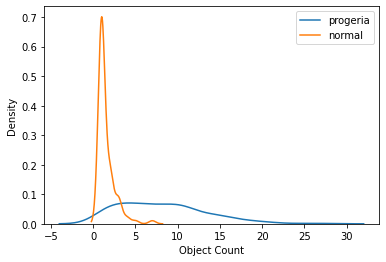

In [262]:
prog_objnum = progeria.groupby('ImageNumber').max('ObjectNumber')['ObjectNumber']
norm_objnum = normal.groupby('ImageNumber').max('ObjectNumber')['ObjectNumber']
sns.kdeplot(x=prog_objnum, label="progeria")
sns.kdeplot(x=norm_objnum, label="normal")
plt.xlabel("Object Count")
plt.legend()
plt.show()

In [273]:
print(np.percentile(prog_objnum, 95))
print(np.percentile(norm_objnum, 95))

17.94999999999999
3.0


# Comparison: restrict all to 3 cell images (kinda arbitrary)

In [12]:
progeria_nc = progeria.groupby('ImageNumber').filter(lambda x: x['ObjectNumber'].max()<=3).reset_index(drop=True)
normal_nc = normal.groupby('ImageNumber').filter(lambda x: x['ObjectNumber'].max()<=3).reset_index(drop=True)
print((len(progeria_nc), len(normal_nc)))
progeria_nc.to_csv(f"{dir}230705_progeria_c2/progeria_3objs.csv")
normal_nc.to_csv(f"{dir}230705_normal_c2/normal_3objs.csv")

(120, 122)


In [8]:
tstats_nc, tps_nc = ttest(cols=relative_features, data1=progeria_nc, data2=normal_nc)

In [9]:
print("more significant in all cells: " + ", ".join([x for x in relative_features if tps_all[x] < tps_nc[x]]))
print("more significant in single cells: " + ", ".join([x for x in relative_features if tps_all[x] > tps_nc[x]]))

more significant in all cells: AreaShape_Compactness, AreaShape_Extent, AreaShape_Orientation, AreaShape_Zernike_4_2, AreaShape_Zernike_5_3, AreaShape_Zernike_5_5, AreaShape_Zernike_6_0, AreaShape_Zernike_6_2, AreaShape_Zernike_6_4, AreaShape_Zernike_6_6, AreaShape_Zernike_7_1, AreaShape_Zernike_7_3, AreaShape_Zernike_7_5, AreaShape_Zernike_7_7, AreaShape_Zernike_8_0, AreaShape_Zernike_8_2, AreaShape_Zernike_8_4, AreaShape_Zernike_8_6, AreaShape_Zernike_8_8, AreaShape_Zernike_9_1, AreaShape_Zernike_9_3, AreaShape_Zernike_9_5, AreaShape_Zernike_9_7, AreaShape_Zernike_9_9
more significant in single cells: AreaShape_Eccentricity, AreaShape_EulerNumber, AreaShape_FormFactor, AreaShape_Solidity, AreaShape_Zernike_0_0, AreaShape_Zernike_1_1, AreaShape_Zernike_2_0, AreaShape_Zernike_2_2, AreaShape_Zernike_3_1, AreaShape_Zernike_3_3, AreaShape_Zernike_4_0, AreaShape_Zernike_4_4, AreaShape_Zernike_5_1


In [10]:
progeria_fewer_objs

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,AreaShape_Zernike_8_8,AreaShape_Zernike_9_1,AreaShape_Zernike_9_3,AreaShape_Zernike_9_5,AreaShape_Zernike_9_7,AreaShape_Zernike_9_9,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number
0,1,1,1468,1998,210,111,173,57,191.260218,83.703678,...,0.003743,0.000147,0.000614,0.002853,0.004647,0.001938,191.260218,83.703678,0,1
1,1,2,1887,2420,198,293,154,238,175.155803,265.281929,...,0.001960,0.010123,0.010872,0.003388,0.002730,0.001055,175.155803,265.281929,0,2
2,1,3,1670,2013,403,378,370,317,386.124551,347.588623,...,0.004437,0.000422,0.001709,0.001811,0.003297,0.001527,386.124551,347.588623,0,3
3,1,4,1516,2115,75,406,28,361,50.935356,382.577836,...,0.000325,0.002362,0.002383,0.003189,0.001942,0.000501,50.935356,382.577836,0,4
4,1,5,1713,2296,134,496,93,440,114.208990,467.850555,...,0.003637,0.006038,0.006354,0.005241,0.001666,0.000782,114.208990,467.850555,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,258,1,73022,101697,408,430,97,103,251.964668,270.975761,...,0.003366,0.009051,0.009114,0.003466,0.001668,0.003888,251.964668,270.975761,0,1
498,259,1,20051,29925,366,420,271,105,326.759015,246.063987,...,0.007246,0.004257,0.007464,0.003554,0.001413,0.001338,326.759015,246.063987,0,1
499,259,2,43492,80514,324,482,135,56,240.638393,272.508001,...,0.006242,0.005979,0.002588,0.014840,0.003823,0.004176,240.638393,272.508001,0,2
500,260,1,37548,47082,354,404,177,138,266.032731,268.818739,...,0.002946,0.000134,0.002126,0.002532,0.001625,0.000706,266.032731,268.818739,0,1


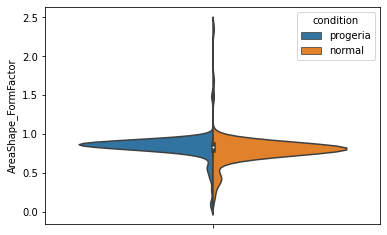

In [11]:
split_vp("AreaShape_FormFactor", data1=progeria_fewer_objs)